<a href="https://colab.research.google.com/github/MbuyiseloNtando/Magic_Telescope/blob/main/Magic_Telescope.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Variables**
*   **fLength** -	major axis of ellipse[mm]
*   **fWidth** - minor axis of ellipse[mm]
*   **fSize** - 10-log of sum of content
    of all pixels [phot]
*   **fcon** - ratio of sum of two highest pixels over fSize [ratio]
*   **fcon1** - ratio of highest pixel over fSize [ratio]
*   **fAsym** - distance from highest pixel to center, projected onto major axis [mm]
*   **fM3Trans** - 3rd root of third moment along major axis [mm]
*   **fM3Trans** - 3rd root of third moment along minor axis [mm]
*   **fAlpha** - angle of major axis with vector to origin [deg]
*   **fDist** - distance from origin to center of ellipse [deg]
*   **class** - gamma(signal), hadron(background)




In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('magic04.data', names=['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class'])
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'magic04.data'

#**Explaratory Data Analysis**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fLength   19020 non-null  float64
 1   fWidth    19020 non-null  float64
 2   fSize     19020 non-null  float64
 3   fConc     19020 non-null  float64
 4   fConc1    19020 non-null  float64
 5   fAsym     19020 non-null  float64
 6   fM3Long   19020 non-null  float64
 7   fM3Trans  19020 non-null  float64
 8   fAlpha    19020 non-null  float64
 9   fDist     19020 non-null  float64
 10  class     19020 non-null  object 
dtypes: float64(10), object(1)
memory usage: 1.6+ MB


In [ ]:
df.isna().sum()

fLength     0
fWidth      0
fSize       0
fConc       0
fConc1      0
fAsym       0
fM3Long     0
fM3Trans    0
fAlpha      0
fDist       0
class       0
dtype: int64

In [ ]:
df.duplicated().sum()

115

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.describe()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
count,18905.000000,18905.000000,18905.000000,18905.000000,18905.000000,18905.000000,18905.000000,18905.000000,18905.000000,18905.000000
mean,53.161416,22.145872,2.824643,0.380247,0.214560,-4.177867,10.618826,0.259364,27.551644,193.712554
std,42.259789,18.300664,0.472377,0.182709,0.110384,59.010059,50.900687,20.775268,26.083055,74.685712
min,4.283500,0.000000,1.941300,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000000,1.282600
25%,24.359700,11.874200,2.477100,0.235800,0.128500,-20.479100,-12.769300,-10.835800,5.516400,142.269000
50%,37.129500,17.143800,2.740000,0.354000,0.196400,4.062900,15.338000,0.750000,17.533000,191.832000
75%,69.975400,24.712400,3.101100,0.503500,0.285000,24.133500,35.869400,10.948900,45.704000,240.409000
max,334.177000,256.382000,5.323300,0.893000,0.675200,575.240700,238.321000,179.851000,90.000000,495.561000


Now the target variable

In [ ]:
df['class'].unique(), df['class'].value_counts()

(array(['g', 'h'], dtype=object),
 class
 g    12332
 h     6573
 Name: count, dtype: int64)

In [ ]:
df['class'] = df['class'].replace({'g':0, 'h':1})
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,0
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,0
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,0
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,0
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from importlib import reload
plt=reload(plt)
%matplotlib inline

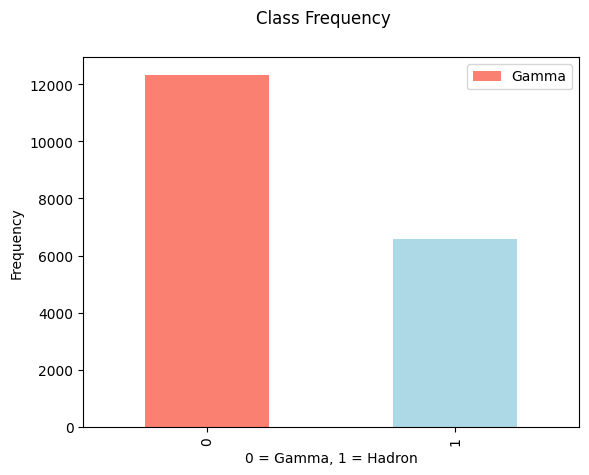

In [ ]:
#Target values frequency bar
df['class'].value_counts().plot(kind='bar', color=['salmon', 'lightblue'])
plt.suptitle('Class Frequency')
plt.xlabel('0 = Gamma, 1 = Hadron')
plt.ylabel('Frequency')
plt.legend(['Gamma', 'Hadron'])

In [ ]:
#This dataset only has numeric features
num = df.columns[:-1]
num

Index(['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long',
       'fM3Trans', 'fAlpha', 'fDist'],
      dtype='object')

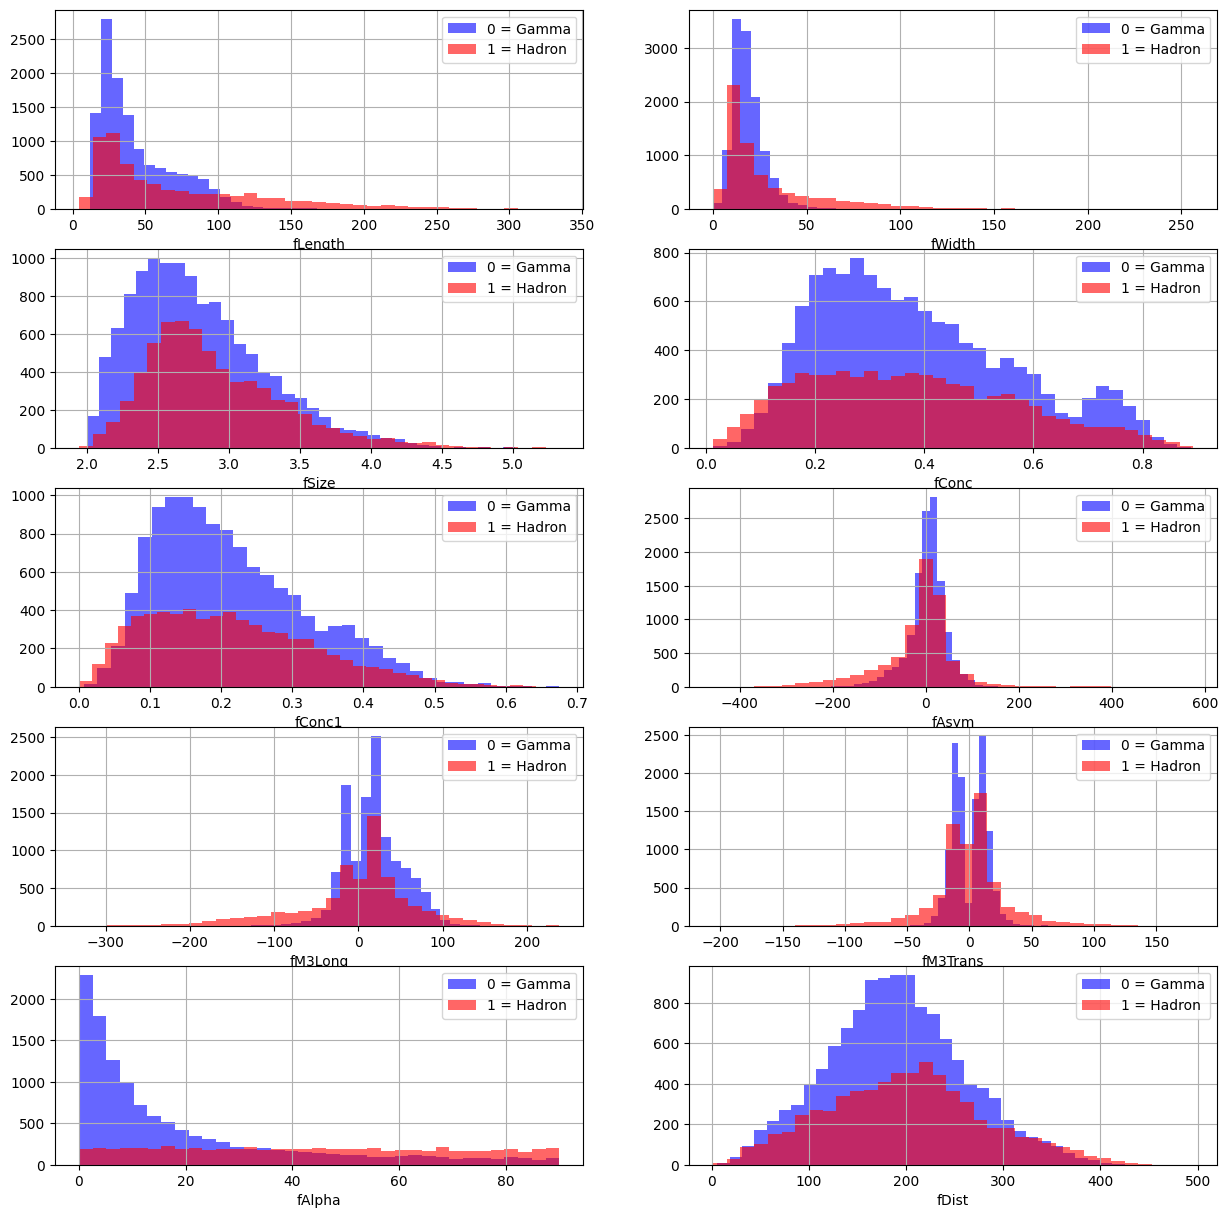

In [ ]:
plt.figure(figsize=(15, 15))
for i, col in enumerate(num, 1):
    plt.subplot(5, 2, i)
    df[df["class"] == 0][col].hist(bins=35, color='blue', label='0 = Gamma', alpha=0.6)
    df[df["class"] == 1][col].hist(bins=35, color='red', label='1 = Hadron', alpha=0.6)
    plt.legend()
    plt.xlabel(col)

*   Gamma's generally have a shorter fLength (major axis of ellipse)
*   Gamma's have a shorter (fWidth) minor axis of ellipse compaaring to hadrons
*   fSize (10-log of sum of content of all pixels) for both are more likely the same
*   Hadrons have fAsym** - distance from highest pixel to center, projected onto major axis [mm]
*   **fM3Trans** - 3rd root of third moment along major axis [mm]
*   **fM3Trans** - 3rd root of third moment along minor axis [mm]
*   **fAlpha** - angle of major axis with vector to origin [deg]
*   **fDist** - distance from origin to center of ellipse [deg]
*   **class** - gamma(signal), hadron(background)

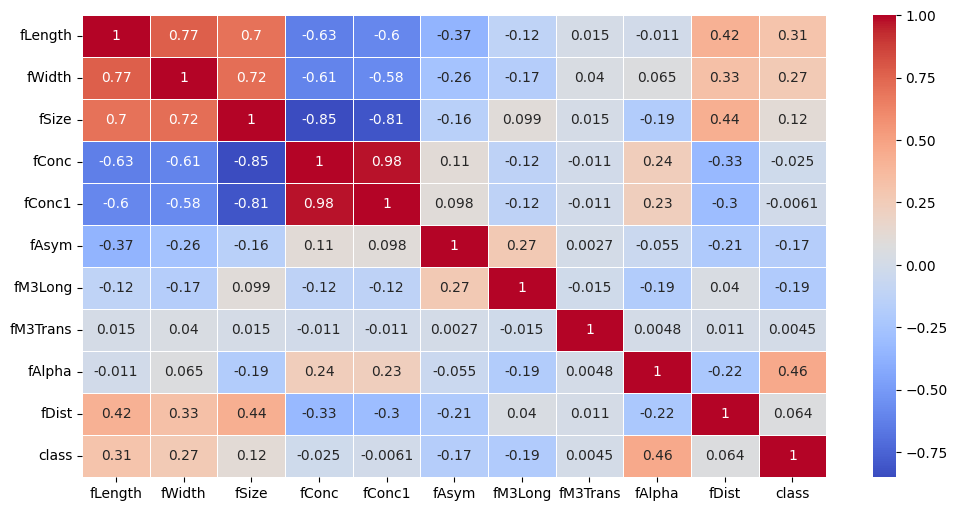

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
ax = sns.heatmap(df.corr(), annot=True, linewidths=0.5, cmap="coolwarm");

Text(0.5, 0, 'Correlation width')

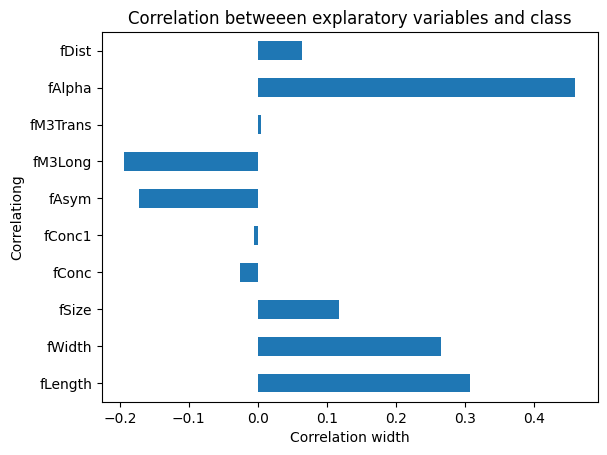

In [ ]:
df.drop('class', axis=1).corrwith(df['class']).plot(kind ='barh')
plt.title("Correlation betweeen explaratory variables and class")
plt.ylabel('Correlationg')
plt.xlabel('Correlation width')

#**Data Processing and Model building**

In [ ]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,0
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,0
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,0
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,0
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,0


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [ ]:
X = df.drop('class', axis=1)
y = df['class']

In [ ]:
X.shape, y.shape

((18905, 10), (18905,))

In [ ]:
#Scalling the exploritory variables
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 79.32%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.804588     0.762451  0.793176      0.78352      0.789883
recall        0.901178     0.591701  0.793176      0.74644      0.793176
f1-score      0.850149     0.666311  0.793176      0.75823      0.785993
support    9846.000000  5278.000000  0.793176  15124.00000  15124.000000
_______________________________________________
Confusion Matrix: 
 [[8873  973]
 [2155 3123]]

Test Result:
Accuracy Score: 78.79%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.806182     0.739088  0.787887     0.772635      0.783202
recall        0.891794     0.588417  0.787887     0.740106      0.787887
f1-score      0.846830     0.655202  0.787887     0.751016      0.781197
support    2486.000000  1295.000

**logistic regression hyperparameters**

In [ ]:
#hyperparameter logistic regression
from sklearn.model_selection import GridSearchCV

# parameter grid to define the hyperparameters
params = {"C": np.logspace(-4, 4, 20),
          "solver": ["liblinear"]}

lr_clf = LogisticRegression()

lr_cv = GridSearchCV(lr_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=5)
lr_cv.fit(X_train, y_train)



best_params = lr_cv.best_params_
print(f"Best parameters: {best_params}")
lr_clf = LogisticRegression(**best_params)

lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'C': 1.623776739188721, 'solver': 'liblinear'}
Train Result:
Accuracy Score: 79.31%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy     macro avg  weighted avg
precision     0.804571     0.762265   0.79311      0.783418      0.789807
recall        0.901077     0.591701   0.79311      0.746389      0.793110
f1-score      0.850093     0.666240   0.79311      0.758167      0.785932
support    9846.000000  5278.000000   0.79311  15124.000000  15124.000000
_______________________________________________
Confusion Matrix: 
 [[8872  974]
 [2155 3123]]

Test Result:
Accuracy Score: 78.79%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.806182     0.739088  0.787887     0.772635      0.783202
recall        0.891794     0.588417  0.787887 

In [ ]:
test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]],
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,79.311029,78.78868


In [ ]:
test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100

tuning_results_df = pd.DataFrame(
    data=[["Tuned Logistic Regression", train_score, test_score]],
    columns=['Model', 'Training Accuracy %', 'Testing Accuracy %']
)
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,79.311029,78.78868


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

print_score(knn_clf, X_train, y_train, X_test, y_test, train=True)
print_score(knn_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 88.08%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy     macro avg  weighted avg
precision     0.866825     0.917568  0.880786      0.892196      0.884533
recall        0.965164     0.723380  0.880786      0.844272      0.880786
f1-score      0.913355     0.808984  0.880786      0.861169      0.876931
support    9846.000000  5278.000000  0.880786  15124.000000  15124.000000
_______________________________________________
Confusion Matrix: 
 [[9503  343]
 [1460 3818]]

Test Result:
Accuracy Score: 83.89%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.832683     0.857292  0.838931     0.844988      0.841112
recall        0.944891     0.635521  0.838931     0.790206      0.838931
f1-score      0.885246     0.729933  0.838931     0.807590      0.832051
support    2486.000000  129

In [ ]:
test_score = accuracy_score(y_test, knn_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, knn_clf.predict(X_train)) * 100

results_df2 = pd.DataFrame(data=[["K-nearest neighbors", train_score, test_score]],
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
#results_df = results_df.append(results_df_2, ignore_index=True)
results_df2

,Model,Training Accuracy %,Testing Accuracy %
0,K-nearest neighbors,88.078551,83.89315


In [ ]:
from sklearn.svm import SVC


svm_clf = SVC(kernel='rbf', gamma=0.1, C=1.0)
svm_clf.fit(X_train, y_train)

print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 87.35%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy     macro avg  weighted avg
precision     0.861874     0.904156  0.873512      0.883015      0.876629
recall        0.959476     0.713149  0.873512      0.836312      0.873512
f1-score      0.908060     0.797373  0.873512      0.852716      0.869432
support    9846.000000  5278.000000  0.873512  15124.000000  15124.000000
_______________________________________________
Confusion Matrix: 
 [[9447  399]
 [1514 3764]]

Test Result:
Accuracy Score: 87.04%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.860029     0.898910  0.870405     0.879469      0.873346
recall        0.958970     0.700386  0.870405     0.829678      0.870405
f1-score      0.906809     0.787326  0.870405     0.847068      0.865886
support    2486.000000  129

In [ ]:
test_score = accuracy_score(y_test, svm_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, svm_clf.predict(X_train)) * 100

results_df3 = pd.DataFrame(data=[["Support Vector Machine", train_score, test_score]],
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
#results_df = results_df.append(results_df_2, ignore_index=True)
results_df2

,Model,Training Accuracy %,Testing Accuracy %
0,K-nearest neighbors,88.078551,83.89315


In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                0       1  accuracy  macro avg  weighted avg
precision     1.0     1.0       1.0        1.0           1.0
recall        1.0     1.0       1.0        1.0           1.0
f1-score      1.0     1.0       1.0        1.0           1.0
support    9846.0  5278.0       1.0    15124.0       15124.0
_______________________________________________
Confusion Matrix: 
 [[9846    0]
 [   0 5278]]

Test Result:
Accuracy Score: 82.49%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.859621     0.754217  0.824914     0.806919      0.823520
recall        0.876911     0.725097  0.824914     0.801004      0.824914
f1-score      0.868180     0.739370  0.824914     0.803775      0.824062
support    2486.000000  1295.000000  0.824914  3781.000000   3781.000000
__________________

In [ ]:
test_score = accuracy_score(y_test, tree_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, tree_clf.predict(X_train)) * 100

results_df4 = pd.DataFrame(data=[["Decision Tree Classifier", train_score, test_score]],
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
#results_df = results_df.append(results_df_2, ignore_index=True)

In [ ]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
#tree.plot_tree(tree_clf)
#plt.show()

<Figure size 2500x2000 with 0 Axes>

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf_clf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                0       1  accuracy  macro avg  weighted avg
precision     1.0     1.0       1.0        1.0           1.0
recall        1.0     1.0       1.0        1.0           1.0
f1-score      1.0     1.0       1.0        1.0           1.0
support    9846.0  5278.0       1.0    15124.0       15124.0
_______________________________________________
Confusion Matrix: 
 [[9846    0]
 [   0 5278]]

Test Result:
Accuracy Score: 88.10%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.885023     0.871592  0.880984     0.878307      0.880423
recall        0.941271     0.765251  0.880984     0.853261      0.880984
f1-score      0.912281     0.814967  0.880984     0.863624      0.878951
support    2486.000000  1295.000000  0.880984  3781.000000   3781.000000
__________________

In [ ]:
test_score = accuracy_score(y_test, rf_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, rf_clf.predict(X_train)) * 100

results_df5 = pd.DataFrame(data=[["Random Forest Classifier", train_score, test_score]],
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
#results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,79.311029,78.78868


In [ ]:
results = pd.concat([results_df, results_df2, results_df3, results_df4, results_df5])
results

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,79.311029,78.788680
0,K-nearest neighbors,88.078551,83.893150
0,Support Vector Machine,87.351230,87.040465
0,Decision Tree Classifier,100.000000,82.491404
0,Random Forest Classifier,100.000000,88.098387
